# Runkeeper Analysis

### Introduction
<p>  Mr. Andrii Pavlenko, a project instructor from datacamp shares his personal fitness data gathered on the app called Runkeeper. The app keeps data about physical training activities over period of time. He has exported his personal training data, from 2012 through 2018. information about Data : He has a training goal of running 1000 km every year. Any activity called 'Other' is Unicycling. If the average heart rate is not available and can not be computed in other way, it can be replaced by 110 bpm. The data is a CSV file where each row is a single training activity. He wants to get answers to the following questions:
1.	How fast, long, and intense was the run?
2.	Has he succeeded with his training goal?

  

Load and inspect the data
Since the data is recorded overtime, it will at least one or several columns corresponding to time. I Lets first load only two lines of the data frame and check.

In [1]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt


# Define file containing dataset
runkeeper_file = 'datasets/cardioActivities.csv'

# Just read first two lines of the file to know contents of columns
pd.read_csv(runkeeper_file, nrows=2)

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx


Now that I know which column corresponds to time, I load the entire data, parsing dates correctly and designating 'Date' as the index column. I look at the shape of data frame and summary of the data.

In [2]:
# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=["Date"], index_col=["Date"])

# First look at exported data: select sample of 3 random rows 
#display(df_activities.shape)
display(df_activities.sample(3))

# Print DataFrame summary
display(df_activities.info())

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2017-01-12 18:19:37,1a0c5ffe-b6ef-4c05-8126-acd92ab1b5a6,Running,NaN,12.00,1:08:08,5:41,10.57,860.0,100,148.0,NaN,TomTom MySports Watch,2017-01-12-181937.gpx
2015-09-24 18:28:14,949d5983-73ea-4a25-a589-87e0280b1b8e,Running,NaN,9.43,51:16,5:26,11.03,650.0,77,138.0,NaN,TomTom MySports Watch,2015-09-24-182814.gpx
2016-08-20 15:43:49,d71c6646-114b-4fb9-a011-d195c560591b,Cycling,NaN,31.48,1:29:50,2:51,21.03,740.0,553,138.0,NaN,TomTom MySports Watch,2016-08-20-154349.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

None

###  Data preprocessing
 
**1. Removing unwanted columns:**
There are some columns in the dataframe that are not entirely useful. e.g Activity Id : because we already have dates as index, *Friend's Tagged* and *Route Name* are empty, *Notes* is not required to answer the questions stated in earlier section. So, I remove them. 
 
**2. Replacing the activity named 'Other' in column 'Type':**
It is replaced by 'Unicycling'. 

NA values are inspected again.



In [3]:
# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
df_activities=df_activities.drop(columns=cols_to_drop)

# Count types of training activities
display(df_activities['Type'].value_counts())

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] =df_activities['Type'].str.replace('Other', 'Unicycling')

# Count missing values for each column
df_activities.isnull().sum()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

**3. Replacing NA values:**
Now only Average Hear Rate (bmp) has NA values. NA values will be replaced by average heart rate for that particular activity. Firstly, I calculate the respective averages. I split the data frame in 4 dataframes according to their activity type and replace NA values.


In [4]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_walk = df_activities[df_activities['Type'] == 'Walking']['Average Heart Rate (bpm)'].mean()
avg_hr_ucycle = df_activities[df_activities['Type'] == 'Unicycling']['Average Heart Rate (bpm)'].mean()

# Alternatively, # Function to calculate avg of col2 with respect to uniue categories in col1
#def avg_col2_col1(df,col1,col2):
 #   uniq = df[col1].unique()  
  #  avg_col2=[]
   # for i in range(len(uniq)):
       # avg_col2 =[i]
    #   avg_col2.append(df[df[col1]==uniq[i]][col2].mean())
    
    #return avg_col2;


# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
df_ucycle = df_activities[df_activities['Type'] == 'UnicCycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_ucycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_ucycle), inplace=True)

# Count missing values for each column in running data
df_run.isna().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

### Data Visualization
</p> Note that the most frequent physical activity is running. Cyling and walking and Unicyling together contribute to less than 10% of total activity, so focus will be on data corresponding to Running.


To begin with, running I plot for different parameters separately, each as a function of time as a figure with four subplots, one for each running metric (each numerical column). The parameters considered for Running are *Distance(km)*, *Average Heart Rate (bpm)*, *Average Speed (km/h)*, *Climb (m)* 

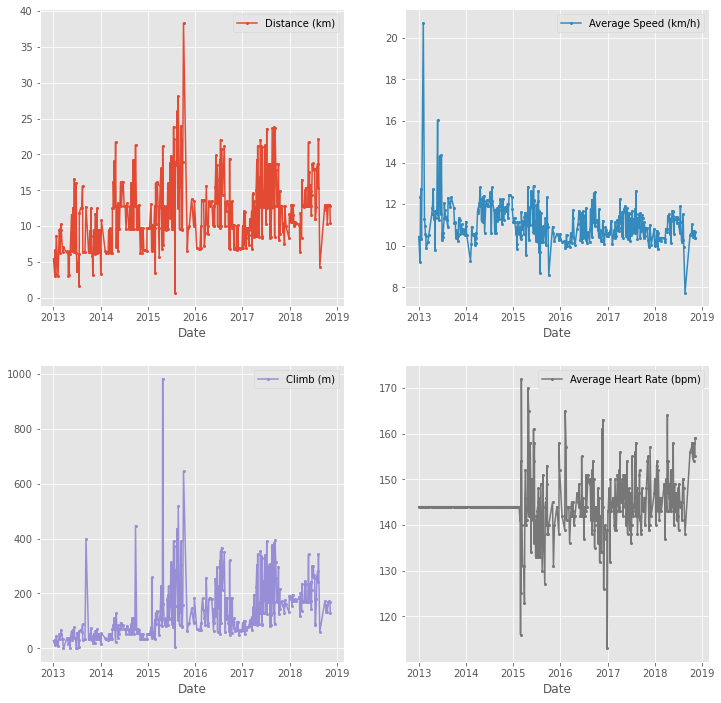

In [5]:
# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run['2018':'2013']

# plot and customize 
runs_subset_2013_2018.plot( subplots=True,
                           sharex=False,
                           figsize=(12,12),
                           linestyle='-',
                           marker='o',
                           markersize= 2,
                          layout =(2,2))
                                                                    


plt.show()

### Answering the questions:
**1. How fast, long, and intense was the run?**
<p> Lets investigate further points in order to know how good Mr.Pavlenko is doing and weather he has attained his goal.
<li>  What is the average distance annually, weekly?
<li> What is the average speed ??
<li> How intense are the workouts? Higher the average heart rate, harder the workout.
<li> What is the weekly frequency of running?
It is clear from data that heart rate was not measured before March 2015. So, I subset the data frame from March 2015 till 2018. Then dataframe is grouped by years or weeks and average distance is calculated. Lastly, data is grouped by weeks, rows in each group are counted. Average of this number gives weekly frequency of running.


In [6]:
# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run['2018':'2015']

# Calculate annual statistics
print('Annual average distance from 2015 to 2018:')
display(runs_subset_2015_2018.resample('A').mean())

# Calculate weekly statistics
print('Weekly average from from 2015 to 2018:')
display(runs_subset_2015_2018.resample('W').mean().mean())

# Mean weekly counts
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean() 
print('Frequency of training:', weekly_counts_average)

Annual average distance from 2015 to 2018:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly average from from 2015 to 2018:


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

Frequency of training: 1.5


I plot the distance and heart rate for every single running session over the entire time range from March 2015 to 2018 to
so observe overall progress.  

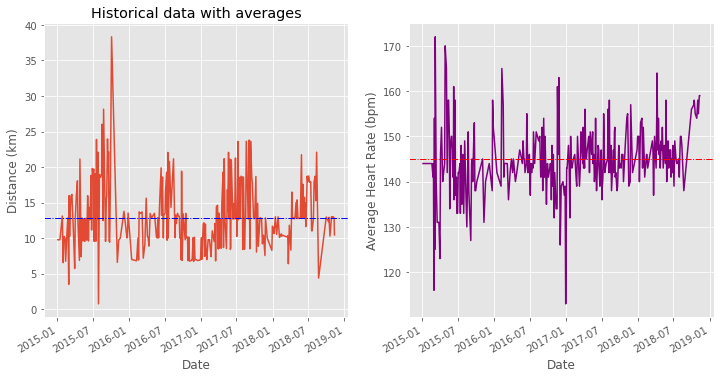

In [7]:
# Prepare data
runs_subset_2015_2018 = df_run['2018':'2015']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# plot
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(12, 6))
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

runs_hr.plot(ax=ax2, color='purple')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='red', linewidth=1, linestyle='-.')

# Show plot
plt.show()

#### Intensity of the run:
<p> As seen from the plots above, the heart rate varies in a wide range, above and below average so it is hard to see how may runs were intense from the graphs above. Let us divide the heart rate in five different groups (or patches) ranging from easy (minimum heart rate) to maximal (maximum heart rate) and plot a histogram to see how many runs were intense. 
    

Intense Runs: 73.0 %


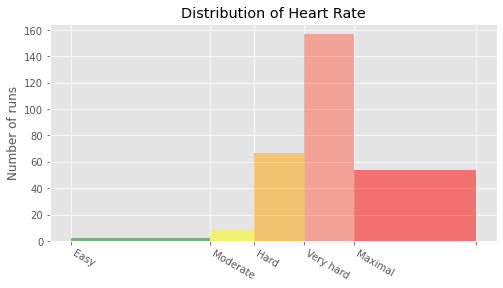

In [8]:
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['2018':'2015-03']['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(8,4))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of Heart Rate', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels= zone_names, rotation=-30, ha='left')
intense_runs = round(((n[-1]+n[-2])/sum(n))*100,0)
print('Intense Runs:', intense_runs,'%')

# Show plot
plt.show()

So, nearly 73% of the runs were intense. 

**2. Has he reached his goal?**
<p> the goal was to run 1000 km per year. Let us find out total distance run every year and see for how many years has he reached his goal. Here, since we do not need average heart rate, we can go back to data from 2013 to 2018, group by annually and take sum for each year.

Date
2013-12-31     498.25
2014-12-31     755.76
2015-12-31    1115.43
2016-12-31     821.64
2017-12-31    1099.49
2018-12-31     853.70
Freq: A-DEC, Name: Distance (km), dtype: float64


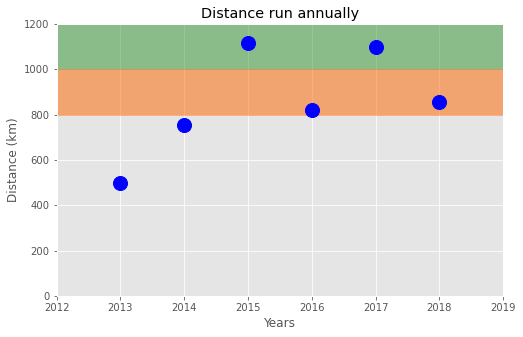

In [9]:
df_run_dist_annual = df_run['2018':'2013']['Distance (km)'].resample('A').sum()

# plot
fig = plt.figure(figsize=(8,5))
ax = df_run_dist_annual.plot(marker='o', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1200], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Distance run annually')

print(df_run_dist_annual)

ax.axhspan(1000, 1200, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(800, 1000, color='red', alpha=0.3)

# Show plot
plt.show()

### Conclusion 
The data was loaded from a .csv file and further cleaned by removing unnecessary columns, replacing NA values and other values as per requirement. Data analysis was focused on Running activity since it was the most frequent (over 90%). 

The average distance run pe week for the period of 2015 to 2018 was 12.5 km with average speed 10.8 km/hr. The weekly frequency of the workouts was 1.5 runs per week. About 73% of the workouts can be classified as Intense. The target of running 1000 km per year was attained in 2015 and 2017 , narrowly missing in 2018. If he had run nearly 13 time more covering the average distance in each run, he would have reached the goal.
